# Project Example Notebook

## Load the Data


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

Extract data from csv file and display the shape and size. Shape of the data set should be (372037, 785).

In [6]:
data = pd.read_csv("handwritten_data_sample.csv", encoding = "utf8").values
np.random.shuffle(data)

# Split the data into X, Y, and parition the values into the training and test splits
# Reshape X to be in the shape (N, 28, 28)
X, Y = data[:,1:], data[:,0]
# X = X.reshape(X.shape[0], 28, 28)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print("Train {} {}".format(X_train.shape, Y_train.shape))
print("Test {} {}".format(X_test.shape, Y_test.shape))

Train (799, 784) (799,)
Test (200, 784) (200,)


In [7]:
classes = np.unique(Y_train)
n_classes = len(classes)
print('Total number of outputs : ', n_classes)
print('Output classes : ', classes)

Total number of outputs :  1
Output classes :  [0]


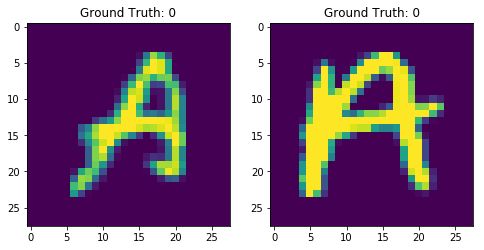

In [8]:
X_example1 = X_train[0]
X_example2 = X_test[0]

fig= plt.figure(figsize=(8,8))

X_example1_2d = X_example1.reshape(28,28)
fig.add_subplot(1,2,1)
plt.imshow(X_example1_2d)
plt.title("Ground Truth: {}".format(Y_train[0]))

X_example2_2d = X_example2.reshape(28,28)
fig.add_subplot(1,2,2)
plt.imshow(X_example2_2d)
plt.title("Ground Truth: {}".format(Y_test[0]))

plt.show()


## Data Preprocessing

In [9]:
from keras.utils import to_categorical

/Users/winston/uci/year3/spring18/cs175/final_project/.env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [10]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print("Train {}".format(X_train.shape))
print("Test {}".format(X_test.shape))

Train (799, 28, 28, 1)
Test (200, 28, 28, 1)


In [8]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Normalize and standardize the data
mean_image = np.mean(X_train, axis=0)
X_train = (X_train - mean_image) / 255
X_test = (X_test - mean_image) / 255

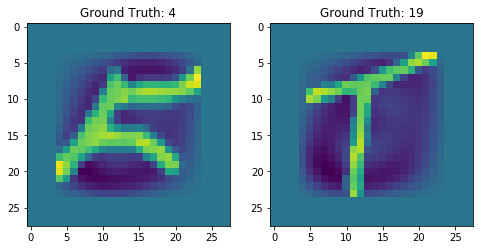

In [8]:
X_example1 = X_train[0]
X_example2 = X_test[0]

fig= plt.figure(figsize=(8,8))

X_example1_2d = X_example1.reshape(28,28)
fig.add_subplot(1,2,1)
plt.imshow(X_example1_2d)
plt.title("Ground Truth: {}".format(Y_train[0]))

X_example2_2d = X_example2.reshape(28,28)
fig.add_subplot(1,2,2)
plt.imshow(X_example2_2d)
plt.title("Ground Truth: {}".format(Y_test[0]))

plt.show()

In [9]:
Y_train_onehot = to_categorical(Y_train)
Y_test_onehot = to_categorical(Y_test)

print("Original Label: {}".format(Y_train[0]))
print("One Hot Label: {}".format(Y_train_onehot[0]))

Original Label: 4
One Hot Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [10]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train_onehot, test_size=0.2)

print("Train: {} {}".format(X_train.shape, Y_train.shape))
print("Valid: {} {}".format(X_valid.shape, Y_valid.shape))

Train: (238103, 28, 28, 1) (238103, 26)
Valid: (59526, 28, 28, 1) (59526, 26)
